# Final Project (ECON570)
* Instructor: Dr. Ida Johnsson
* Authors: Seongmoon CHO, James GROSS, and Jaehyun HA
* Date: 05/06/2022

# 1. Introduction

## a. Research question

Price modeling in the real estate field has a long history. The theory of hedonic modeling, suggested by Rosen (1974), assumes that the property price could be explained by relevant features such as the attributes of the property (i.e., housing) itself, as well as factors related to neighborhoods and the environment. Building on this theory, hedonic models for housing prices were generally suggested by using an ordinary least square (OLS) regression model. While the models using OLS are useful because it provides statistical inference, it is sometimes limited in terms of prediction power as well as assumptions (e.g., independence, homoskedasticity, and normal distribution) that should be fulfilled. On the other hand, recent studies have suggested that machine learning and deep learning tools generally perform well for hedonic models. In this final project, we test five different modeling approaches to examine whether adopting machine learning tools in hedonic modeling can provide us with better prediction power.  

- Rosen, S. (1974). Hedonic prices and implicit markets: product differentiation in pure competition. Journal of political economy, 82(1), 34-55.

## b. Significance

Recent literature on hedonic models for housing prices generally focused on adding explanatory variables with new perspectives to increase the prediction power. For instance, the number of accessible jobs, amenities located nearby, quality of parks and sidewalks, greenness of neighborhoods, and safety are features that are known to contribute to predicting housing price better. However, the main limitation of previous approaches using the OLS regression model is related to the weak prediction power. In this aspect, it is necessary to apply new methodologies that can help increase the prediction power of hedonic models. While machine learning tools are also limited with regards to inference, they provide a strong data-driven prediction. Machine learning tools are expected to provide new ways of predicting housing prices, further suggesting implications in domains where the high accurary of prediction results are significant. 

## c. Literature review

A large number of studies applied machine learning (ML) approaches to predict housing prices with high accuracy. For instance, Truong et al. (2020) tested different types of ML tools including Random Forest, XGBoost, and LightGBM for housing price prediction. The authors highlighted the pros and cons of each method; Random Forest model is susceptible to overfitting, while the prediction power of XGBoost and LightGBM are moderate. To add, the authors suggested that future research should focus on combining ML tools and Deep Learning methods, as well as develop faster ways to fit complicated models. Another paper by Badu & Chandran (2019) summarized the key advantages and disadvantages of different prediction methods. In particular, the authors suggested that linear models are related to under-fitting, whereas complicated models often report overfitted results. The authors further implied that the ridge regression and LASSO may provide efficient means for housing price prediction with less overfitting issues. Other recent studies were also able to suggest ways to consider nonlinearities in hedonic models and integate multiple regression models and ML tools (Montero et al., 2018; Pérez-Rave et al., 2019).

- Babu, A., & Chandran, A. S. (2019). Literature Review on Real Estate Value Prediction Using Machine Learning. International Journal of Computer Science and Mobile Applications (IJCSMA), 7(3), 8-9.
- Montero, J. M., Mínguez, R., & Fernández-Avilés, G. (2018). Housing price prediction: parametric versus semi-parametric spatial hedonic models. Journal of Geographical Systems, 20(1), 27-55.
- Pérez-Rave, J. I., Correa-Morales, J. C., & González-Echavarría, F. (2019). A machine learning approach to big data regression analysis of real estate prices for inferential and predictive purposes. Journal of Property Research, 36(1), 59-96.
- Truong, Q., Nguyen, M., Dang, H., & Mei, B. (2020). Housing price prediction via improved machine learning techniques. Procedia Computer Science, 174, 433-442.

# 2. Data

## a. Data source

We use the Ames Housing Dataset compiled by De Cock (2011). We downloaded the data from one of the competitions held in Kaggle (https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/overview). We used the train dataset which included 1,400 rows of data on housing price and related attributes. It should be noted that we were unable to use the test data because it did not include the dependent variable (i.e. housing price). For the explanatory variables, there were 80 features mostly related to the features of the housing itself, lot, living space, basement, garage, and bathroom. Other features included the name of neighborhood and the year when the housing was sold. The explanatory variables were mixed of continuous and categorical (both nominal and ordinal) variables, which we had to clean for data analysis. 

- De Cock, D. (2011). Ames, Iowa: Alternative to the Boston housing data as an end of semester regression project. Journal of Statistics Education, 19(3).

## b. Data cleaning

### Libraries Import

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np
import math

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

from numpy import mean
from numpy import absolute
from numpy import sqrt

from scipy.cluster import hierarchy
from scipy.spatial.distance import pdist

from sklearn import neighbors
from sklearn.cluster import DBSCAN, KMeans
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, StratifiedKFold, RepeatedStratifiedKFold, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler, MinMaxScaler

### Data Import

In [2]:
df = pd.read_csv('data_cleaned.csv') #read csv file

## Descriptive Analysis

In [3]:
response = ["log_SalePrice"]
predictors = ['LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LandSlope',
          'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofMatl', 'MasVnrArea', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 
          'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', 
          '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
          'Fireplaces', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 
          'ScreenPorch', 'PoolArea', 'SaleCondition', 'Corner', 'CulDSac', 'FR2', 'FR3', 'Inside', 'Blmngtn', 'Blueste', 'BrDale', 'BrkSide', 'ClearCr', 'CollgCr', 
          'Crawfor', 'Edwards', 'Gilbert', 'IDOTRR', 'MeadowV', 'Mitchel', 'NAmes', 'NPkVill', 'NWAmes', 'NoRidge', 'NridgHt', 'OldTown', 'SWISU', 'Sawyer', 'SawyerW', 'Somerst', 
          'StoneBr', 'Timber', 'Veenker', '1Fam', '2Fam', 'Twnhs', '1.5Fin', '1.5Unf', '1Story', '2.5Fin', '2.5Unf', '2Story', 'SFoyer', 'SLvl', 'Gable', 'Hip', 'Others', 'BrkCmn', 
          'BrkFace', 'None', 'Stone', 'Y_2006', 'Y_2007', 'Y_2008', 'Y_2009', 'Y_2010']

In [4]:
# We log transformed our dependent variable
df['log_SalePrice'] = np.log(df['SalePrice'])

In [5]:
df.describe()

,Id,SalePrice,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LandSlope,...,BrkCmn,BrkFace,None,Stone,Y_2006,Y_2007,Y_2008,Y_2009,Y_2010,log_SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,180921.195890,57.623288,10516.828082,0.995890,0.062329,0.633562,0.897945,0.999315,0.946575,...,0.010274,0.304795,0.597260,0.087671,0.215068,0.225342,0.208219,0.231507,0.119863,12.024051
std,421.610009,79442.502883,34.664304,9981.264932,0.063996,0.241835,0.481996,0.302824,0.026171,0.224956,...,0.100873,0.460478,0.490617,0.282913,0.411011,0.417951,0.406174,0.421940,0.324913,0.399452
min,1.000000,34900.000000,0.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.460242
25%,365.750000,129975.000000,42.000000,7553.500000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.775097
50%,730.500000,163000.000000,63.000000,9478.500000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.001505
75%,1095.250000,214000.000000,79.000000,11601.500000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.273731
max,1460.000000,755000.000000,313.000000,215245.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,13.534473


In [6]:
df.corr()

,Id,SalePrice,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LandSlope,...,BrkCmn,BrkFace,None,Stone,Y_2006,Y_2007,Y_2008,Y_2009,Y_2010,log_SalePrice
Id,1.000000,-0.021917,-0.019761,-0.033226,0.008916,0.000682,0.030748,-0.015657,-0.013324,-0.019548,...,-0.040379,-0.036425,0.028211,0.024760,0.012036,-0.025269,-0.000348,0.026623,-0.016859,-0.017942
SalePrice,-0.021917,1.000000,0.209624,0.263843,0.041036,-0.123611,-0.267672,-0.027545,0.014314,-0.051116,...,-0.044394,0.198191,-0.367456,0.330476,0.010732,0.034921,-0.022990,-0.010292,-0.016392,0.948374
LotFrontage,-0.019761,0.209624,1.000000,0.100739,-0.025107,-0.042656,0.153770,-0.038989,0.043535,0.021940,...,-0.032411,-0.036471,-0.029400,0.121902,0.013099,0.000991,0.005331,-0.026180,0.009489,0.179303
LotArea,-0.033226,0.263843,0.100739,1.000000,-0.197131,-0.075624,-0.216111,-0.256843,-0.010123,-0.310711,...,0.115884,-0.016388,-0.030547,0.038328,-0.001436,0.018749,0.003642,-0.012244,-0.010954,0.257320
Street,0.008916,0.041036,-0.025107,-0.197131,1.000000,0.016562,-0.004414,0.119812,-0.001682,0.175177,...,0.006545,-0.003983,-0.009091,0.019913,0.033625,-0.016604,-0.019794,0.035258,-0.042220,0.057369
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Y_2007,-0.025269,0.034921,0.000991,0.018749,-0.016604,-0.010213,-0.011710,-0.051034,0.014120,-0.017666,...,0.042591,0.023941,-0.031750,0.000905,-0.282318,1.000000,-0.276582,-0.296025,-0.199037,0.035951
Y_2008,-0.000348,-0.022990,0.005331,0.003642,-0.019794,0.056185,0.001391,-0.011007,0.013425,-0.013194,...,-0.018791,0.001255,0.008368,-0.009854,-0.268430,-0.276582,1.000000,-0.281462,-0.189245,-0.012644
Y_2009,0.026623,-0.010292,-0.026180,-0.012244,0.035258,-0.007168,0.006256,0.008017,-0.047699,0.022078,...,-0.007611,-0.045932,0.007039,0.065267,-0.287299,-0.296025,-0.281462,1.000000,-0.202549,-0.021048
Y_2010,-0.016859,-0.016392,0.009489,-0.010954,-0.042220,-0.042808,0.035567,0.040818,0.009661,0.003276,...,-0.016687,-0.001553,0.002061,0.004903,-0.193170,-0.199037,-0.189245,-0.202549,1.000000,-0.021236


The data has 111 features including Id and it is difficult to understand what features are related to the response variable of SalePrice. So, we will calculate the coefficient of variation to select what variables have the largest variability. These variables can have influence on the response variable. In this descriptive analysis, we would look at these variables.

In [7]:
#calculate the coefficiation of variation
predictors_cv = df[predictors]
cv = dict()
for v in predictors:
    variability = np.std(predictors_cv[v].values.tolist())/np.mean(predictors_cv[v].values.tolist())
    cv[v] = variability

In [8]:
#select 10 features that have the highest CV
cv_sort=sorted(cv.items(), key=lambda x: x[1], reverse=True)

#take keys to make scatter plots
key_feature = []
for i in range (0,11):
    key_feature.append(cv_sort[i][0])

#append the response to key features
key_feature.append(response[0])
key_feature

['Blueste',
 'FR3',
 'PoolArea',
 '2.5Fin',
 'NPkVill',
 'Veenker',
 '2.5Unf',
 '1.5Unf',
 'BrkCmn',
 'BrDale',
 'Blmngtn',
 'log_SalePrice']

In [9]:
key_features = df[key_feature]
key_features.describe()

,Blueste,FR3,PoolArea,2.5Fin,NPkVill,Veenker,2.5Unf,1.5Unf,BrkCmn,BrDale,Blmngtn,log_SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,0.001370,0.002740,2.758904,0.005479,0.006164,0.007534,0.007534,0.009589,0.010274,0.010959,0.011644,12.024051
std,0.036999,0.052289,40.177307,0.073846,0.078298,0.086502,0.086502,0.097486,0.100873,0.104145,0.107313,0.399452
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.460242
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.775097
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.001505
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.273731
max,1.000000,1.000000,738.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,13.534473


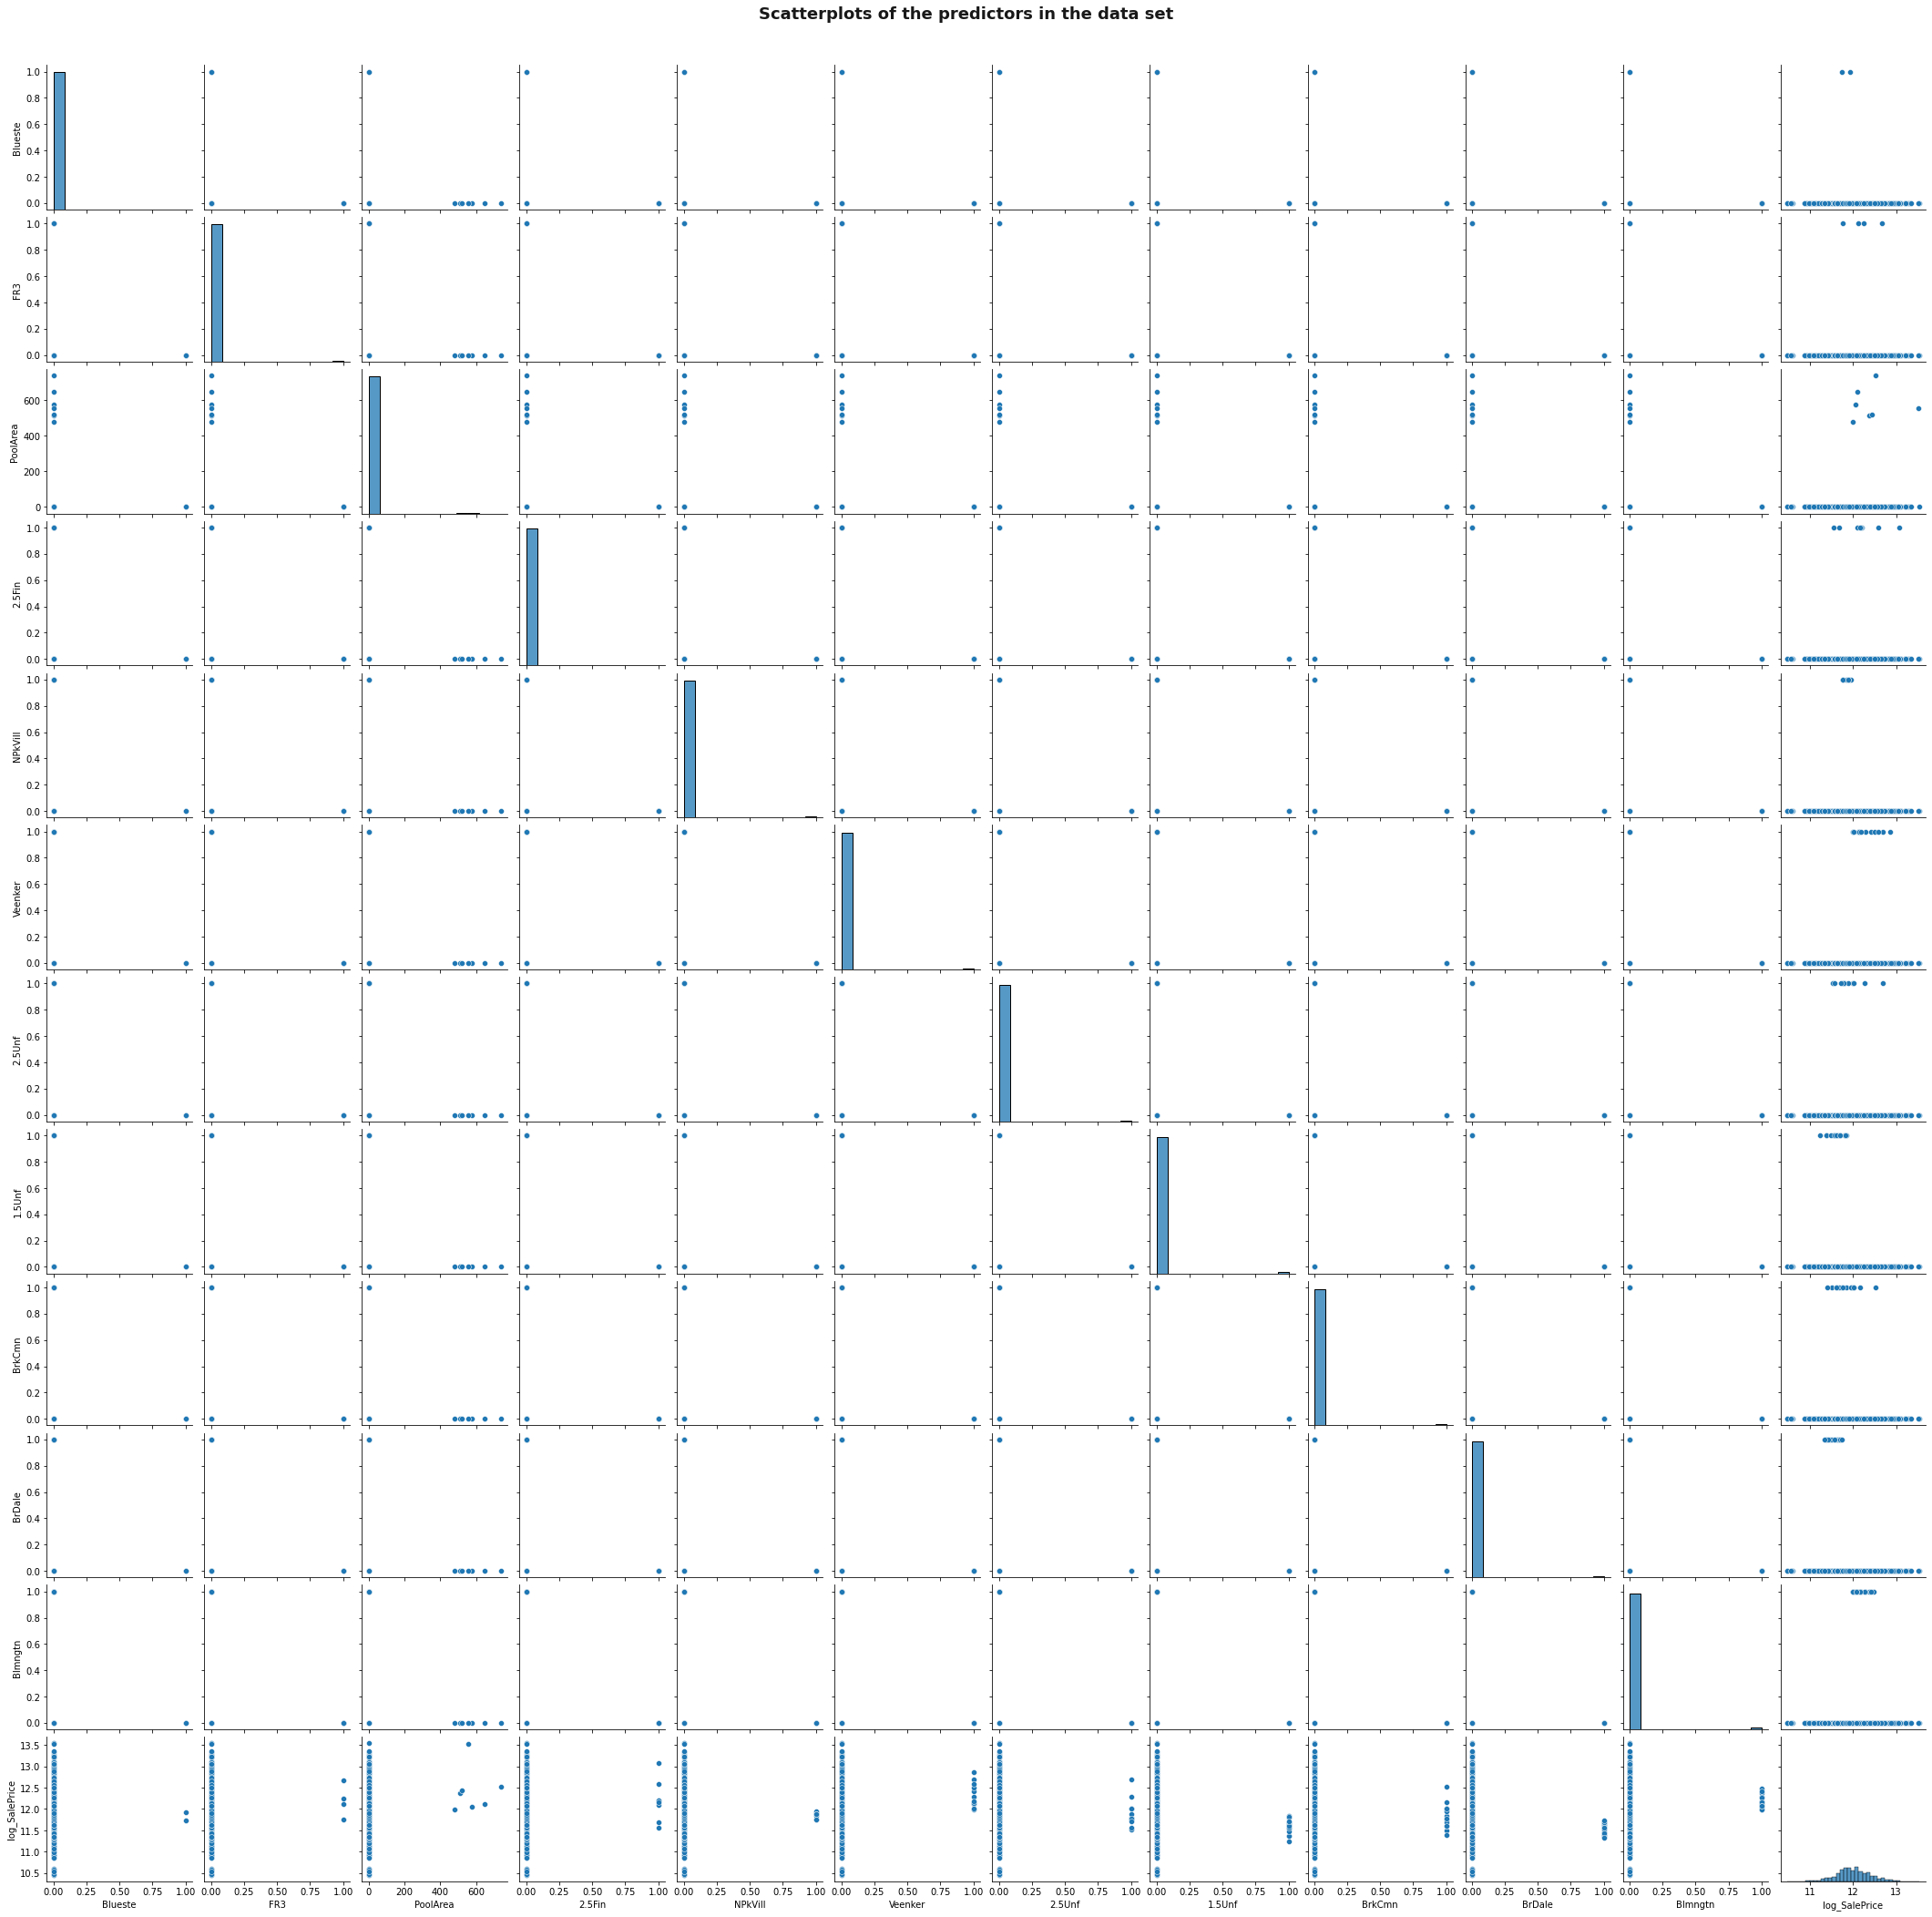

In [10]:
# Make scatterplots of the independent variables in the dataset
pairplot_fig = sns.pairplot(key_features, vars=key_feature)
plt.subplots_adjust(top=0.95)
pairplot_fig.fig.suptitle("Scatterplots of the predictors in the data set", fontsize=18, alpha=0.9, weight='bold')
plt.show()

Most of the variables are dummies. So, the variances of the predicters would make the model less precise and less efficient. The observations would be larger than the degree of freedom given its 1,460 observations. Still, an OLS model would suffer from its inefficiency for prediction because of a number of dummy variables.

<AxesSubplot:xlabel='Blmngtn', ylabel='log_SalePrice'>

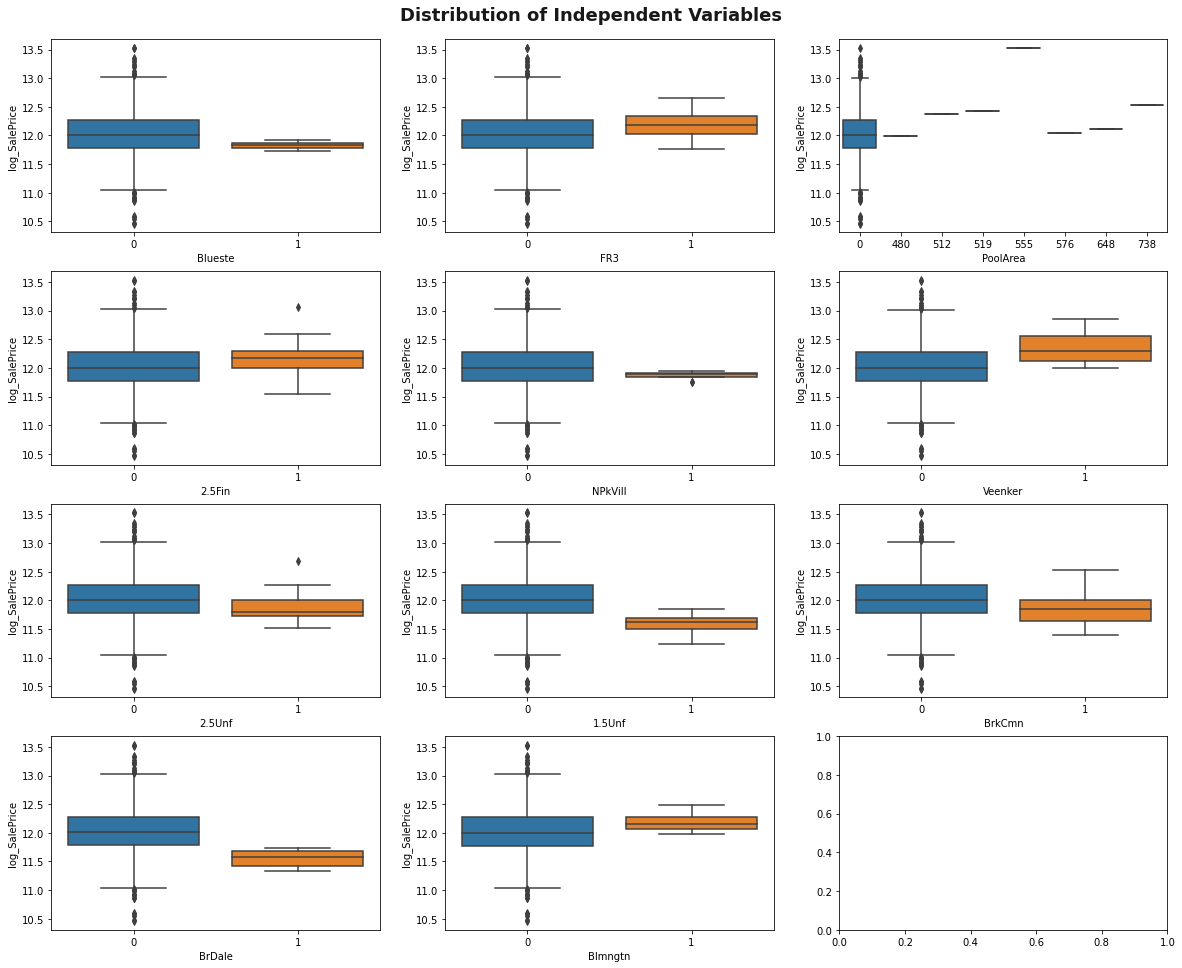

In [11]:
# Make boxplots for each of the independent variable
fig, axes = plt.subplots(4, 3, figsize=(20,15))
plt.subplots_adjust(top=0.95)
fig.suptitle('Distribution of Independent Variables', fontsize=18, alpha=0.9, weight='bold')

sns.boxplot(ax=axes[0, 0], x=key_feature[0], y=response[0], data=key_features, orient='v')
sns.boxplot(ax=axes[0, 1], x=key_feature[1], y=response[0], data=key_features, orient='v')
sns.boxplot(ax=axes[0, 2], x=key_feature[2], y=response[0], data=key_features, orient='v')
sns.boxplot(ax=axes[1, 0], x=key_feature[3], y=response[0], data=key_features, orient='v')
sns.boxplot(ax=axes[1, 1], x=key_feature[4], y=response[0], data=key_features, orient='v')
sns.boxplot(ax=axes[1, 2], x=key_feature[5], y=response[0], data=key_features, orient='v')
sns.boxplot(ax=axes[2, 0], x=key_feature[6], y=response[0], data=key_features, orient='v')
sns.boxplot(ax=axes[2, 1], x=key_feature[7], y=response[0], data=key_features, orient='v')
sns.boxplot(ax=axes[2, 2], x=key_feature[8], y=response[0], data=key_features, orient='v')
sns.boxplot(ax=axes[3, 0], x=key_feature[9], y=response[0], data=key_features, orient='v')
sns.boxplot(ax=axes[3, 1], x=key_feature[10], y=response[0], data=key_features, orient='v')

# 3. Fitting

## a. Split Train/Test sets

In [12]:
# feature scaling: important for optimal performance especially if algorithm
# uses gradient descent or requires regularization
y = df[response]
X = df[predictors]

In [13]:
# split data into 70/30 training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20220506)

In [14]:
#Drop Id, Categorical, and Dummy Features
temp = X_train.loc[:,(X_train.max()!=1)]
notdummies = temp.loc[:,(temp.dtypes!="object")].columns

In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train[notdummies]) 

X_train[notdummies] = scaler.transform(X_train[notdummies])

X_test[notdummies] = scaler.transform(X_test[notdummies])

<ipython-input-15-93fd6235bc10>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[notdummies] = scaler.transform(X_train[notdummies])
C:\Users\COM\Anaconda3\envs\ppd599\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
<ipython-input-15-93fd6235bc10>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead


## b. Define Function

In [16]:
def model_validation(X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test, mod=1, param=[i for i in range(10)]):
    """
    This returns error rates of train and test sets by fitting train set to the selected model
    ----------
    X_train, X_test, y_train, y_test = splited data set
    mod = 1.LinearRegression; 2.Primary Component Regression; 3.Ridge Regression; 4.Lasso Regression; 5.Random Forest
    param_set = list of parameter
    -------
    return list
    """
    train_error=[]
    test_error=[]
    for i in param:
        # Linear Regression
        if mod==1:
#             print("Linear Regression")
            model=LinearRegression()
            model.fit(X_train, y_train)
            train_error.append(round(1-model.score(X_train, y_train),3))
            test_error.append(round(1-model.score(X_test, y_test),3))

        # PCA Regression
        elif mod==2:
#             print("PCA Regression")
            pca=PCA(n_components=i)
            X_train_reduced = pca.fit_transform(X_train)
            X_test_reduced = pca.fit_transform(X_test)
            model=LinearRegression()
            y_pred=model.fit(X_train_reduced, y_train).predict(X_train_reduced)
            y_pred1=model.fit(X_train_reduced, y_train).predict(X_test_reduced)
            train_error.append(round(1-r2_score(y_train, y_pred),3))
            test_error.append(round(1-r2_score(y_test, y_pred1),3))
                        
        # Ridge Regression
        elif mod==3:
#             print("Ridge Regression")
            model=Ridge(alpha=10**i)
            y_pred=model.fit(X_train, y_train).predict(X_train)
            y_pred1=model.fit(X_train, y_train).predict(X_test)
            train_error.append(round(1-r2_score(y_train, y_pred),3))
            test_error.append(round(1-r2_score(y_test, y_pred1),3))

        # Lasso Regression
        elif mod==4:
#             print("Lasso Regression")
            model=Lasso(alpha=10**i, max_iter=10000000)
            y_pred=model.fit(X_train, y_train).predict(X_train)
            y_pred1=model.fit(X_train, y_train).predict(X_test)
            train_error.append(round(1-r2_score(y_train, y_pred),3))
            test_error.append(round(1-r2_score(y_test, y_pred1),3))
        
    return train_error, test_error

## Linear Models

### a. Linear Regression

In [17]:
M_set = [M for M in range (0, 6)]
train, test = model_validation(X_train, X_test, y_train, y_test, mod=1, param=M_set)

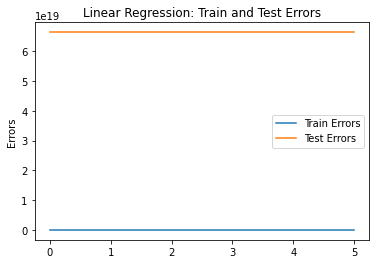

In [18]:
# Visulaization of Train and Test Errors
plt.title('Linear Regression: Train and Test Errors')
plt.plot(M_set, train, label = 'Train Errors')
plt.plot(M_set, test, label = 'Test Errors')
plt.legend()
plt.xlabel('')
plt.ylabel('Errors')
plt.show()

This plot represents the error rates for train and test sets using a model. This figure shows the result of fitting to OLS model. While the train errors look almost zero, the test errors are too large to interpret. This is because OLS model is overfitting the train data set so the fitted model does not work in the prediction using test set.

### b. Primary Component Regression

In [19]:
M_set = [M for M in range (2, 90, 1)]
train_PCR, test_PCR = model_validation(X_train, X_test, y_train, y_test, mod=2, param=M_set)

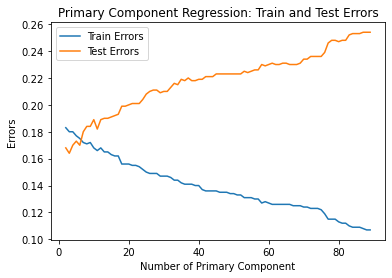

In [20]:
# Visulaization of Train and Test Errors
plt.title('Primary Component Regression: Train and Test Errors')
plt.plot(M_set, train_PCR, label = 'Train Errors')
plt.plot(M_set, test_PCR, label = 'Test Errors')
plt.legend()
plt.xlabel('Number of Primary Component')
plt.ylabel('Errors')
plt.show()

We test the PC regression models by changing the number of primary component from 2 to 90). From the error plot, we can see the train errors would decrease as the number of primary component increases. Like OLS model, the more variables in a PC Regression model, the more overfitting to the train set. Test errors increase in a model with more primary components. When the number of PC was 4, the test error became the lowest value. We chose 4 as the number of PC. 

In [21]:
min(test_PCR)

0.164

In [22]:
test_PCR[1]

0.164

In [23]:
M_set[1]

3

### c. Ridge Regression

In [24]:
M_set = [M for M in range (-5, 5, 1)]
alpha = [10**M for M in range (-5, 5, 1)]
train_ridge, test_ridge = model_validation(X_train, X_test, y_train, y_test, mod=3, param=M_set)

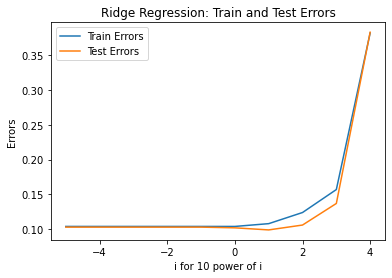

In [25]:
# Visulaization of Train and Test Errors
plt.title('Ridge Regression: Train and Test Errors')
plt.plot(M_set, train_ridge, label = 'Train Errors')
plt.plot(M_set, test_ridge, label = 'Test Errors')
plt.legend()
plt.xlabel('i for 10 power of i')
plt.ylabel('Errors')
plt.show()

We test the ridge regression by changing the parameter, lambda, from $10^{-5}$ to $10^{4}$. From the plot, the train and test errors have similar pattern unlike PCR. When the lambda was 10, the test error was at the minimum. We chose 10 as a lambda for our ridge model in prediction.

In [26]:
min(test_ridge)

0.099

In [27]:
test_ridge[6]

0.099

In [28]:
M_set[6]

1

### d. Lasso Regression

In [29]:
M_set = [M for M in range (-6, 0, 1)]
alpha = [10**M for M in range (-6, 0, 1)]
train_lasso, test_lasso = model_validation(X_train, X_test, y_train, y_test, mod=4, param=M_set)

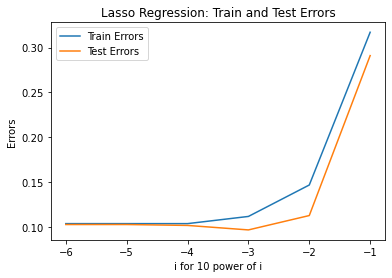

In [30]:
# Visulaization of Train and Test Errors
plt.title('Lasso Regression: Train and Test Errors')
plt.plot(M_set, train_lasso, label = 'Train Errors')
plt.plot(M_set, test_lasso, label = 'Test Errors')
plt.legend()
plt.xlabel('i for 10 power of i')
plt.ylabel('Errors')
plt.show()

We test the lasso regression by changing the parameter, lambda, from $10^{-6}$ to $10^{-1}$. From the plot, the train and test errors have similar pattern unlike PCR. When the lambda was $10^{-3}$, the test error was at the minimum. We chose $10^{-6}$ as a lambda for our lasso model in prediction. The Lasso model is known for making the coefficient of insignificant variables zero. We obtained 62 among 111 features having not-zero coefficient. The deprecated variables were recieved penalty by the model.

In [31]:
# list the variables selected by the model
lasso0001 = Lasso(alpha=0.001, max_iter=10000000).fit(X_train,y_train)
coef = lasso0001.coef_
var_list=[]
for i in range(len(coef)):
    if coef[i] != 0:
        var_list.append(predictors[i])
var_list

['LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'HeatingQC',
 'Electrical',
 '1stFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageFinish',
 'GarageCars',
 'GarageQual',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'SaleCondition',
 'CulDSac',
 'FR2',
 'ClearCr',
 'Crawfor',
 'Edwards',
 'Gilbert',
 'IDOTRR',
 'MeadowV',
 'NWAmes',
 'NoRidge',
 'NridgHt',
 'OldTown',
 'Sawyer',
 'Somerst',
 'StoneBr',
 'Twnhs',
 '1.5Fin',
 '1Story',
 '2Story',
 'Y_2006',
 'Y_2009']

## Non-parametric method

### e. Random Forest Regression

In [32]:
#https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74
#Create a random grid search to tune hyperparameters
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]#try these numbers of trees
max_features = ['auto', 'sqrt']#try these methods for number of features
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]#try these numbers of maximum levels to trees
max_depth.append(None)#also try no maximum
min_samples_split = [2, 5, 10]#try these minimum samples required to split nodes
min_samples_leaf = [1, 2, 4]#try these minimum samples for each node
bootstrap = [True, False]#try both methods for training trees
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}#save hyperparameter sets to try below

In [33]:
#Now we use the hyperparameters above to try one model for each combination. Plug in the distribution of parameters and try each with CV
rf = RandomForestRegressor()#base model
rf_random = RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,random_state=1994,n_jobs= -1)#3-fold cv for time
rf_random.fit(X_train,y_train)#fit best model

Fitting 3 folds for each of 100 candidates, totalling 300 fits


C:\Users\COM\Anaconda3\envs\ppd599\lib\site-packages\sklearn\model_selection\_search.py:880: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=1994, verbose=2)

In [34]:
#Print best parameters
rf_random.best_params_

{'n_estimators': 1600,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 40,
 'bootstrap': False}

In [35]:
#Now take the best parameters from random search and feed into grid search. We can try a few alternate specifications close to the random search results
#to marginally improve our prediction
from sklearn.model_selection import GridSearchCV
param_grid = {
    'bootstrap': [False],
    'max_depth': [36,38,40,42,44],
    'max_features': ['sqrt'],
    'min_samples_leaf': [1,2,3],
    'min_samples_split': [3,4,5,6,7],
    'n_estimators': [1500,1550,1600,1650,1700]
}
rf = RandomForestRegressor()#base model
grid_search = GridSearchCV(estimator=rf,param_grid=param_grid,cv=3,n_jobs=-1,verbose=2)

In [36]:
grid_search.fit(X_train,y_train)#fit best model
grid_search.best_params_

Fitting 3 folds for each of 375 candidates, totalling 1125 fits


C:\Users\COM\Anaconda3\envs\ppd599\lib\site-packages\sklearn\model_selection\_search.py:880: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


{'bootstrap': False,
 'max_depth': 40,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': 1550}

In [37]:
# Training data
pred_train = grid_search.predict(X_train)
rmse_train = math.sqrt(mean_squared_error(y_train, pred_train))
print('RMSE training set', round(rmse_train, 2))

# Test data
pred = grid_search.predict(X_test)
rmse_test =math.sqrt(mean_squared_error(y_test, pred))
print('RMSE test set', round(rmse_test, 2))

RMSE training set 0.01
RMSE test set 0.13


# Model Comparison

In [38]:
# predicted model by fitted model
y_OLS=LinearRegression().fit(X_train,y_train).predict(X_test)

pca=PCA(n_components=3)
X_train_reduced = pca.fit_transform(X_train)
X_test_reduced = pca.fit_transform(X_test)
y_PCR=LinearRegression().fit(X_train_reduced,y_train).predict(X_test_reduced)

y_Ridge=Ridge(alpha=10**0).fit(X_train,y_train).predict(X_test)

y_Lasso=Lasso(alpha=10**(-3), max_iter=100000).fit(X_train,y_train).predict(X_test)

y_RandomForest=pred

In [39]:
# dataframe for the predicted values
predicted_price=pd.DataFrame()
predicted_price['RandomForest'] = list(y_RandomForest)
predicted_price['Lasso'] = list(y_Lasso)
predicted_price['Ridge'] = y_Ridge
predicted_price['PCR'] = y_PCR
predicted_price['OLS'] = y_OLS

predicted_price.head()

,RandomForest,Lasso,Ridge,PCR,OLS
0,11.864030,11.816545,11.841938,11.844044,1.184772e+01
1,11.702828,11.754446,11.779433,11.612838,1.177943e+01
2,11.918846,11.814934,11.862356,11.636671,1.186911e+01
3,12.524033,12.534494,12.521498,12.524201,1.251389e+01
4,11.986714,12.112345,12.173018,12.026037,-6.978470e+10


### Comparison of Distibution

<AxesSubplot:title={'center':'Distribution of Predicted House Price by OLS'}, ylabel='Count'>

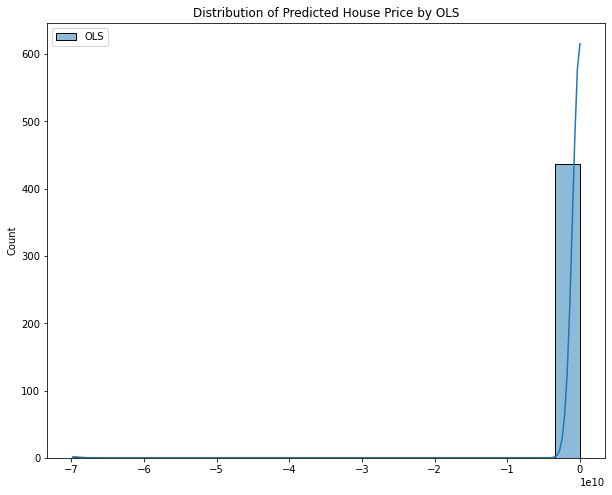

In [40]:
fig, ax = plt.subplots(figsize=(10,8))
plt.title('Distribution of Predicted House Price by OLS')
sns.histplot(data=predicted_price[['OLS']], bins=20, kde=True)

<AxesSubplot:title={'center':'Distribution of Predicted House Price by ML Model'}, ylabel='Count'>

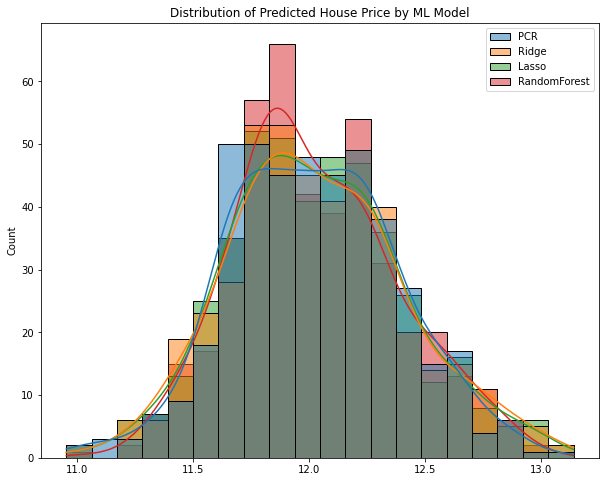

In [41]:
fig, ax = plt.subplots(figsize=(10,8))
plt.title('Distribution of Predicted House Price by ML Model')
sns.histplot(ax=ax,data=predicted_price[['PCR','Ridge','Lasso','RandomForest']], bins=20, alpha=0.5, kde=True)

### Comparison of Statistics across Models

In [42]:
r2 = [round(r2_score(y_test, y_OLS),3),
      round(r2_score(y_test, y_PCR),3),
      round(r2_score(y_test, y_Ridge),3),
      round(r2_score(y_test, y_Lasso),3),
      round(r2_score(y_test, y_RandomForest),3)]
rmse = [round(mean_squared_error(y_test, y_OLS, squared=False),3),
      round(mean_squared_error(y_test, y_PCR, squared=False),3),
      round(mean_squared_error(y_test, y_Ridge, squared=False),3),
      round(mean_squared_error(y_test, y_Lasso, squared=False),3),
      round(mean_squared_error(y_test, y_RandomForest, squared=False),3)]
compare_array = np.array([r2,rmse])

In [43]:
comparison = pd.DataFrame(compare_array, columns=['OLS','PCR','Ridge','Lasso','Random Forest'], index=['R-Squared','RMSE'])
comparison

,OLS,PCR,Ridge,Lasso,Random Forest
R-Squared,-6.635925e+19,0.836,0.898,0.903,0.896
RMSE,3.334442e+09,0.166,0.131,0.127,0.132


# 4. Findings

In order to assess the predictive accuracy of the 5 methods, we provide both RMSE and r^2. These are similar goodness-of-fit measures, where r^2 is scaled from 0 to 1 and RMSE gives the error in more absolute terms. First, we run simple OLS on the dataset to provide a baseline for predictive accuracy. In this result, most observations receive similar predictions and the RMSE is quite high for the test data. However, when running a regression with principal components, we achieve an r^2 of .84 and RMSE of .17. When running regularized regressions, we obtain an r^2 of about .9 and RMSE of .13 in both LASSO and ridge regression. However, LASSO regression is a few hundredths better on both measures, indicating it is the best-performing model for prediction. Finally, random forest regression yields a similar r^2 and RMSE of about .9 and .13, but it is a few hundredths worse than ridge regression, placing it third. Compared to simple OLS as a baseline, all four other models perform noticeably better, with LASSO slightly edging out ridge and random forest on our goodness-of-fit measures. Compared to ridge and random forest which performed only slightly worse, LASSO is also computationally efficient, since it can drive feature coefficients all the way down to zero and remove them. Therefore, we find that LASSO should be the preferred method among the ones we tested.

# 5. Conclusion

Simple OLS is not very useful. As we noted, it is popular for the hedonic method of measuring revealed preference for certain amenities, but it is not useful as a predictive tool. Since we first fit each method to a training dataset, it appears that the OLS estimates were severely overfit and performed terribly on the test dataset. Further, we know conceptually that simple OLS is not well-suited to handle high dimensionality. However, we do see a marked improvement when using principal component analysis to reduce dimensionality before running OLS. When we use regularized regressions, both ridge and LASSO, we see another definitive improvement over principal component regression. Both results were quite similar, given that the only difference between the two methods is how lambda, which penalizes coefficient size, is handled. In LASSO, coefficients can be zero, while in ridge, coefficients can only asymptotically approach zero. Finally, we try random forest regression, which uses a series of decision trees generated through bagging or bootstrapping to make predictions. Random forest performed almost as well as LASSO and ridge regression, and it is possible that with more fine-tuning this method could be the most accurate. However, ridge and LASSO have a much more straightforward method to choose the best value for lambda, while random forest is much more arbitrary and time-consuming, as we had to use a randomized process to run combinations of several hyperparameters. Therefore, we recommend LASSO as a preferred method.

While older, traditional hedonic methods based on simple econometric models still have their place as useful tools to evaluate theory and generate treatment effects, we have demonstrated in this notebook that machine-learning techniques can strongly outperform them in terms of prediction. While this is not as useful in settings where causality is of interest, prediction is also a necessary use case in the real estate market. While each method we tried performed respectively well, we find that LASSO is the best of the five for its higher accuracy, relatively lower computational difficulty, and its ability to reduce dimensions.

- Koehrsen, Will. “Hyperparameter Tuning the Random Forest in Python.” Medium, Towards Data Science, 10 Jan. 2018, https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74. 

#### 
